## Explore The Dataset 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
# Convert the csv file into a Pandas DataFrame
primary_df =pd.read_csv("Resources/Worldwide-Earthquake-database.csv", index_col=0)

# Display sample data
primary_df.head()

,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,EQ_MAG_MW,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
I_D,,,,,,,,,,,,,,,,,,,,,
1,No,-2150,NaN,NaN,NaN,NaN,,NaN,7.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,-2000,NaN,NaN,NaN,NaN,NaN,18.0,7.1,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
5877,Yes,-1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
8,No,-1566,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Total number of row and columns 
primary_df.shape

(6193, 46)

In [4]:
#Printing the columns' name
primary_df.columns

Index(['FLAG_TSUNAMI', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND',
       'FOCAL_DEPTH', 'EQ_PRIMARY', 'EQ_MAG_MW', 'EQ_MAG_MS', 'EQ_MAG_MB',
       'EQ_MAG_ML', 'EQ_MAG_MFA', 'EQ_MAG_UNK', 'INTENSITY', 'COUNTRY',
       'STATE', 'LOCATION_NAME', 'LATITUDE', 'LONGITUDE', 'REGION_CODE',
       'DEATHS', 'DEATHS_DESCRIPTION', 'MISSING', 'MISSING_DESCRIPTION',
       'INJURIES', 'INJURIES_DESCRIPTION', 'DAMAGE_MILLIONS_DOLLARS',
       'DAMAGE_DESCRIPTION', 'HOUSES_DESTROYED',
       'HOUSES_DESTROYED_DESCRIPTION', 'HOUSES_DAMAGED',
       'HOUSES_DAMAGED_DESCRIPTION', 'TOTAL_DEATHS',
       'TOTAL_DEATHS_DESCRIPTION', 'TOTAL_MISSING',
       'TOTAL_MISSING_DESCRIPTION', 'TOTAL_INJURIES',
       'TOTAL_INJURIES_DESCRIPTION', 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
       'TOTAL_DAMAGE_DESCRIPTION', 'TOTAL_HOUSES_DESTROYED',
       'TOTAL_HOUSES_DESTROYED_DESCRIPTION', 'TOTAL_HOUSES_DAMAGED',
       'TOTAL_HOUSES_DAMAGED_DESCRIPTION'],
      dtype='object')

In [5]:
#Narrow down the columns and create a brand new, independent dataframe
worldwide_earthquake_df = primary_df[['FLAG_TSUNAMI', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'FOCAL_DEPTH', 
                                      'EQ_MAG_MW','INTENSITY', 'COUNTRY', 'LATITUDE', 'LONGITUDE',
                                      'TOTAL_DEATHS', 'TOTAL_INJURIES']].copy() 

In [6]:
# Display sample of narrowed down data
worldwide_earthquake_df.head(10)

,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,FOCAL_DEPTH,EQ_MAG_MW,INTENSITY,COUNTRY,LATITUDE,LONGITUDE,TOTAL_DEATHS,TOTAL_INJURIES
I_D,,,,,,,,,,,,,
1,No,-2150,NaN,NaN,NaN,NaN,NaN,NaN,JORDAN,31.1,35.5,NaN,NaN
2,Yes,-2000,NaN,NaN,NaN,NaN,NaN,10.0,SYRIA,35.683,35.8,NaN,NaN
3,No,-2000,NaN,NaN,NaN,18.0,NaN,10.0,TURKMENISTAN,38,58.2,1.0,NaN
5877,Yes,-1610,NaN,NaN,NaN,NaN,NaN,NaN,GREECE,36.4,25.4,NaN,NaN
8,No,-1566,NaN,NaN,NaN,NaN,NaN,10.0,ISRAEL,31.5,35.3,NaN,NaN
11,No,-1450,NaN,NaN,NaN,NaN,NaN,10.0,ITALY,35.5,25.5,NaN,NaN
9712,Yes,-1365,NaN,NaN,NaN,NaN,NaN,NaN,SYRIA,35.683,35.8,NaN,NaN
12,No,-1250,NaN,NaN,NaN,NaN,NaN,NaN,ISRAEL,32,35.5,NaN,NaN
13,No,-1050,NaN,NaN,NaN,NaN,NaN,NaN,JORDAN,29.6,35,NaN,NaN


In [7]:
# Display sample of narrowed down data
worldwide_earthquake_df.tail(10)

,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,FOCAL_DEPTH,EQ_MAG_MW,INTENSITY,COUNTRY,LATITUDE,LONGITUDE,TOTAL_DEATHS,TOTAL_INJURIES
I_D,,,,,,,,,,,,,
10480,No,2020,2.0,23.0,16.0,10.0,6.0,NaN,IRAN,38.482,44.367,10.0,60.0
10483,No,2020,3.0,10.0,10.0,23.0,NaN,8.0,INDONESIA,-6.808,106.676,NaN,4.0
10485,No,2020,3.0,18.0,13.0,12.0,5.7,6.0,USA,40.751,-112.078,NaN,NaN
10486,No,2020,3.0,22.0,5.0,10.0,5.4,8.0,CROATIA,45.897,15.966,1.0,27.0
10487,Yes,2020,3.0,25.0,2.0,57.0,7.5,6.0,RUSSIA,48.986,157.693,NaN,NaN
10488,No,2020,4.0,1.0,12.0,10.0,5.3,NaN,CHINA,33.124,98.916,NaN,NaN
10490,Yes,2020,5.0,2.0,12.0,17.0,6.6,7.0,GREECE,34.205,25.712,NaN,NaN
10491,No,2020,5.0,7.0,20.0,10.0,NaN,NaN,IRAN,35.725,52.044,2.0,22.0
10494,No,2020,5.0,18.0,13.0,10.0,5.2,NaN,CHINA,27.296,103.281,4.0,24.0


In [8]:
#Total number of row and columns of the new dataframe
worldwide_earthquake_df.shape

(6193, 13)

In [9]:
# Get information about the DataFrame
worldwide_earthquake_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6193 entries, 1 to 10501
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FLAG_TSUNAMI    6193 non-null   object 
 1   YEAR            6193 non-null   int64  
 2   MONTH           5786 non-null   float64
 3   DAY             5632 non-null   float64
 4   HOUR            4151 non-null   float64
 5   FOCAL_DEPTH     3228 non-null   float64
 6   EQ_MAG_MW       1321 non-null   float64
 7   INTENSITY       2815 non-null   float64
 8   COUNTRY         6193 non-null   object 
 9   LATITUDE        6144 non-null   object 
 10  LONGITUDE       6144 non-null   object 
 11  TOTAL_DEATHS    1693 non-null   float64
 12  TOTAL_INJURIES  1253 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 677.4+ KB


#### Handling null values: 
##### we narrowed down the number of columns that have the most number of null values and also we are not using them for our analysis goals.
##### We leave the rest of missing values as is because it is the nature or characteristics of our dataset.
##### Comparing the total number of data (rows) 6193 with the number of Non-Null Count of each column shows that we were able to reduce the number of null values by dropping some columns resonabally.
##### As it is presented in the head and the tail of the dataset the more resent the data is the less missing value is in our dataset, which is because in many years ago there is not much data recorded. 

## Generate a bar chart showing  the top 20 countries with the highest earthquake counts

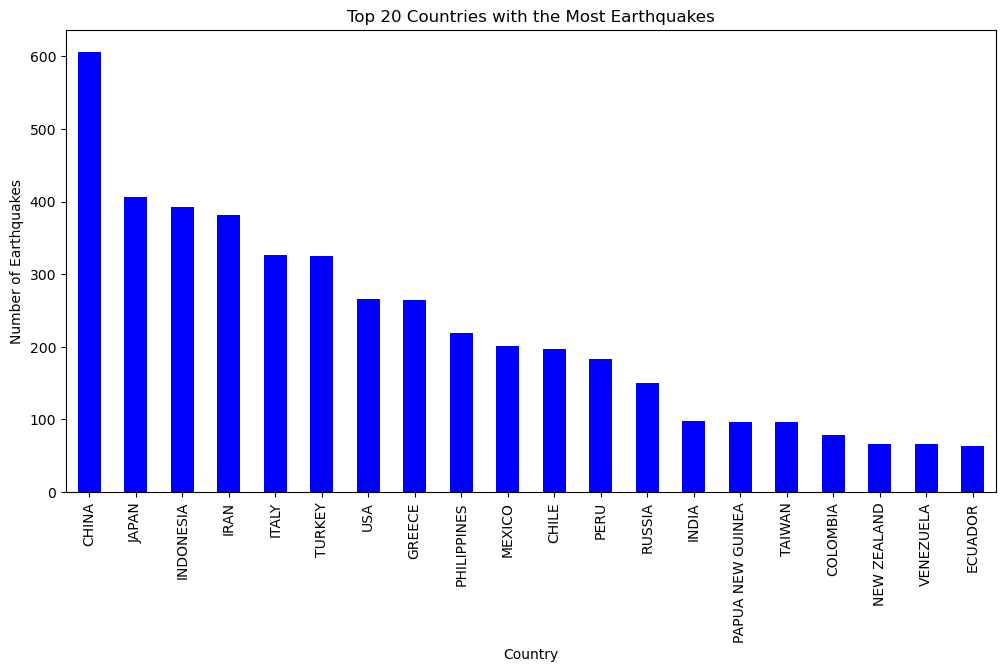

In [11]:
# Count the number of earthquakes per country
earthquake_count_per_country = worldwide_earthquake_df['COUNTRY'].value_counts()

# Select the top 20 countries
top_countries = earthquake_count_per_country.head(20)

# plot the bar chart
top_countries.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Top 20 Countries with the Most Earthquakes')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.show()




## Generate a bar chart showing  the top 20 countries with the highest earthquake Intensity  (intensity>=7.5)

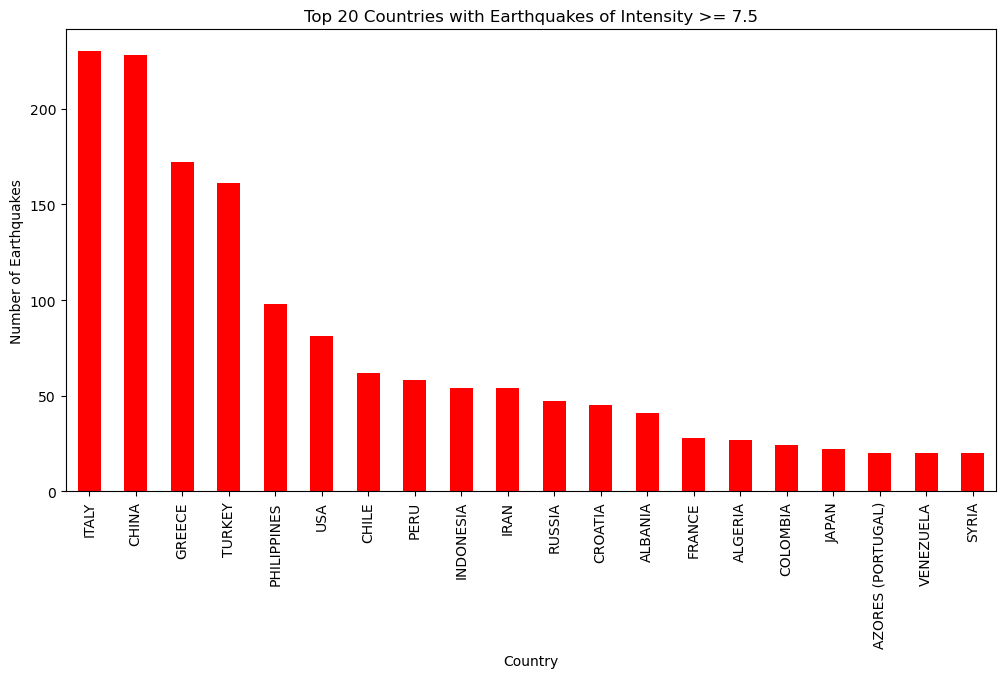

In [28]:
# Filter earthquakes with INTENSITY >= 7.5
high_intensity_earthquakes = worldwide_earthquake_df[worldwide_earthquake_df['INTENSITY'] >= 7.5]

# Count the number of earthquakes per country
earthquake_count_per_country = high_intensity_earthquakes['COUNTRY'].value_counts()

# Select the top 20 countries
top_countries = earthquake_count_per_country.head(20)

# Plotting the bar chart
top_countries.plot(kind='bar', figsize=(12, 6), color='red')
plt.title('Top 20 Countries with Earthquakes of Intensity >= 7.5')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.show()

##  provide a quick overview of the spatial distribution of earthquakes based on their latitudes and longitudes for the top 20 countries with the highest earthquake counts.

In [18]:
# Convert latitude and longitude columns to strings
top_countries['LATITUDE'] = top_countries['LATITUDE'].astype(str)
top_countries['LONGITUDE'] = top_countries['LONGITUDE'].astype(str)
print(top_countries['LATITUDE'])                                                           

# Scatter plot of latitudes and longitudes
plt.figure(figsize=(10, 6))
plt.scatter(top_countries['LONGITUDE'], top_countries['LATITUDE'], color='red', alpha=0.5)
plt.title('Earthquake Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

KeyError: 'LATITUDE'